In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install scikit-learn


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


In [ ]:
def perceptron(X, Y, num_iterations=100, learning_rate=0.1):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)

    for iter in range(num_iterations):
        errors = []
        for idx, sample in enumerate(X):
            c = Y[idx]
            f = sample

            weighted_sum = np.dot(f, weights)
            output = 1 if weighted_sum >= 0 else 0
            errors.append(c - output)

            weights += learning_rate * errors[-1] * f


        if all(error == 0 for error in errors):
            break

    return weights

def train_perceptron(X_train, Y_train, X_test, Y_test, target_accuracy=0.75, num_iterations=100, learning_rate=0.1):
    X_train = np.column_stack([X_train, np.zeros(len(X_train))])
    X_test = np.column_stack([X_test, np.zeros(len(X_test))])
    weights = perceptron(X_train, Y_train, num_iterations, learning_rate)
    predictions = [1 if np.dot(sample, weights) >= 0 else 0 for sample in X_test]

    accuracy = accuracy_score(Y_test, predictions)

    # Repeat until the training accuracy is achieved
    while accuracy < target_accuracy:
        weights = perceptron(X_train, Y_train, num_iterations, learning_rate)
        predictions = [1 if np.dot(sample, weights) >= 0 else 0 for sample in X_test]
        accuracy = accuracy_score(Y_test, predictions)
    return weights, accuracy


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ailabmiod/diabetes_binary_health_indicators_BRFSS2021.csv")


In [ ]:
df


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,1.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,...,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0
236374,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,...,0,1.0,2.0,20.0,0.0,0.0,0,3,4.0,5.0
236375,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,10.0
236376,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,10,4.0,6.0


In [ ]:
X = df.iloc[:, 1:].values


In [ ]:
X


array([[ 0.,  1.,  1., ..., 11.,  4.,  5.],
       [ 1.,  0.,  1., ..., 11.,  4.,  3.],
       [ 1.,  1.,  1., ...,  9.,  4.,  7.],
       ...,
       [ 0.,  1.,  1., ...,  7.,  6., 10.],
       [ 1.,  0.,  1., ..., 10.,  4.,  6.],
       [ 0.,  1.,  1., ...,  6.,  6.,  6.]])

In [ ]:
y = df.iloc[:,0].values


In [ ]:
y


array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show(block=False)




Weights: [ 32.8  23.9 -21.7   0.9  -8.4  11.3  18.5 -15.3  -1.3  -6.8 -35.1 -27.5
 -19.    6.9  -1.1   0.4  13.3   7.9   0.7 -10.6  -3.9   0. ]
Accuracy: 0.8537524325239022


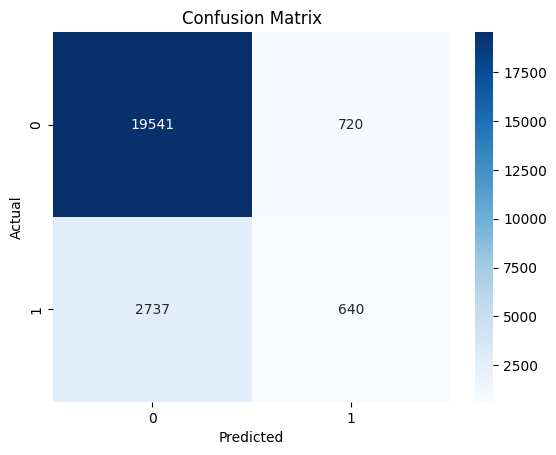

Weights: [ 32.   26.4 -24.5   0.5  -5.9  11.8  21.1 -17.3   1.3  -3.7 -35.4 -27.1
 -16.3  10.   -3.5   2.5  10.9   6.4   4.3  -8.3  -5.3   0. ]
Accuracy: 0.7924528301886793


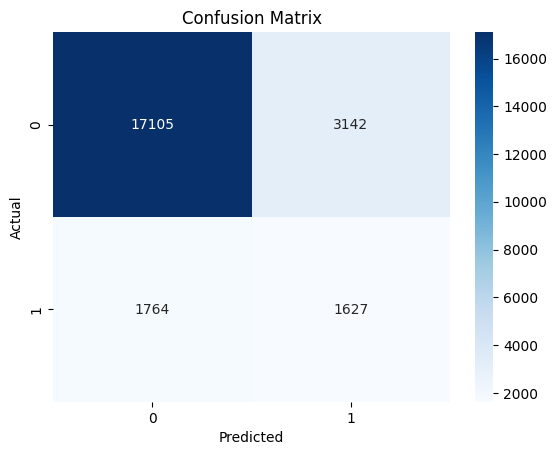

Weights: [ 32.   23.6 -22.1   0.6  -6.4  10.4  17.6 -15.   -0.4  -6.8 -36.1 -28.7
 -17.    8.8  -5.7  -0.7  12.7   6.8   2.8  -9.8  -5.3   0. ]
Accuracy: 0.8541331753955496


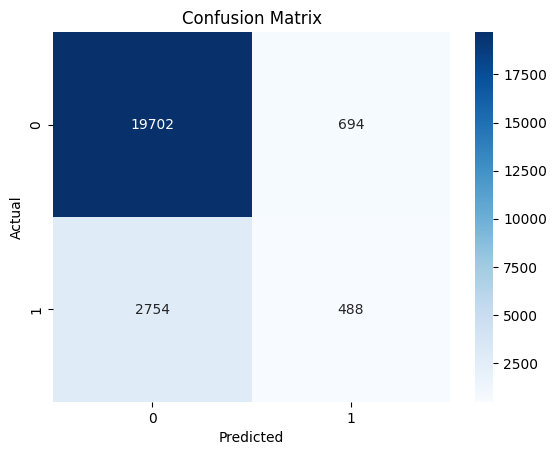

Weights: [ 3.21000000e+01  2.32000000e+01 -2.33000000e+01 -1.01136877e-11
 -8.50000000e+00  9.70000000e+00  1.91000000e+01 -1.45000000e+01
 -7.00000000e-01 -1.90000000e+00 -3.45000000e+01 -2.96000000e+01
 -1.49000000e+01  8.00000000e+00 -2.30000000e+00  2.00000000e+00
  1.18000000e+01  6.30000000e+00  4.60000000e+00 -1.12000000e+01
 -5.50000000e+00  0.00000000e+00]
Accuracy: 0.8372535747525172


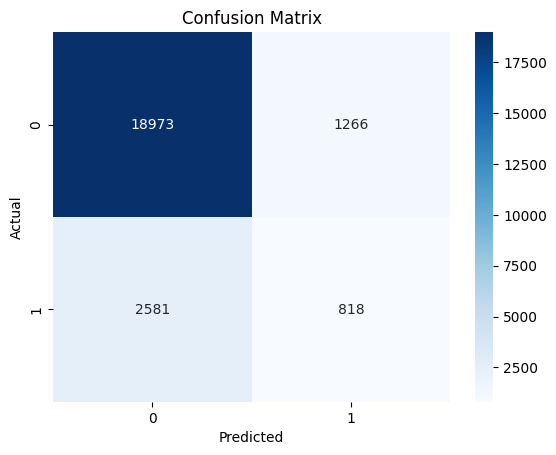

Weights: [ 29.5  23.5 -22.7   0.4  -6.8  11.5  18.3 -15.3  -1.5  -3.6 -36.1 -26.5
 -16.9  10.3  -2.   -0.3  11.7   7.5   2.7  -9.7  -7.1   0. ]
Accuracy: 0.8534139944157713


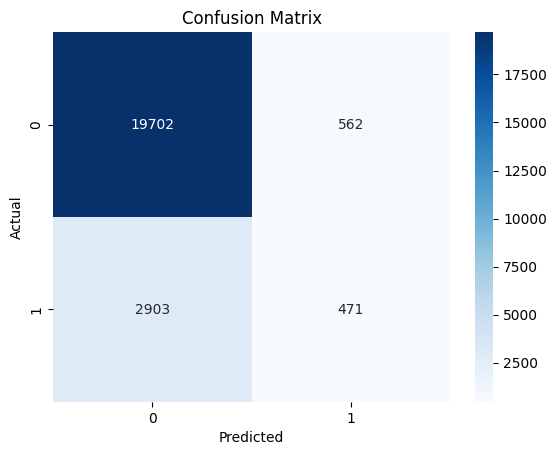

Weights: [ 32.1  23.9 -21.4   0.6  -6.3  10.3  22.1 -17.4  -1.1  -3.8 -36.6 -28.2
 -19.6  10.3   0.4  -0.6  13.4   5.    2.7 -13.   -4.8   0. ]
Accuracy: 0.8466452322531517


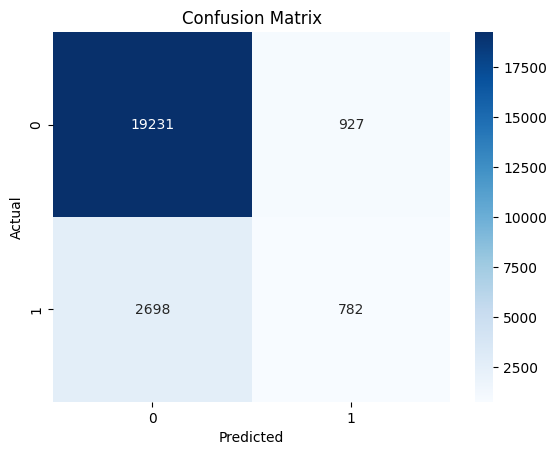

Weights: [ 29.3  26.  -23.6   0.8 -10.1  10.5  21.2 -13.3  -0.6  -3.7 -36.5 -29.
 -18.3   6.4  -4.2   1.   12.5   5.3   3.5 -10.4  -4.5   0. ]
Accuracy: 0.8346729841780185


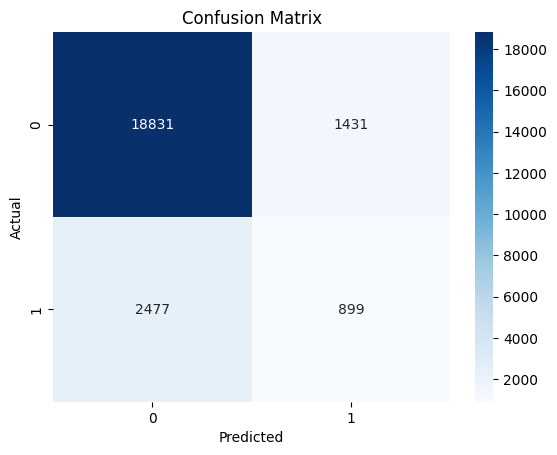

Weights: [ 32.   24.  -21.6   1.3  -7.9   9.1  22.3 -17.1   0.5  -2.6 -33.1 -25.5
 -18.8   6.   -1.8   0.6  12.2   8.3   1.3 -11.   -4.8   0. ]
Accuracy: 0.845883746509857


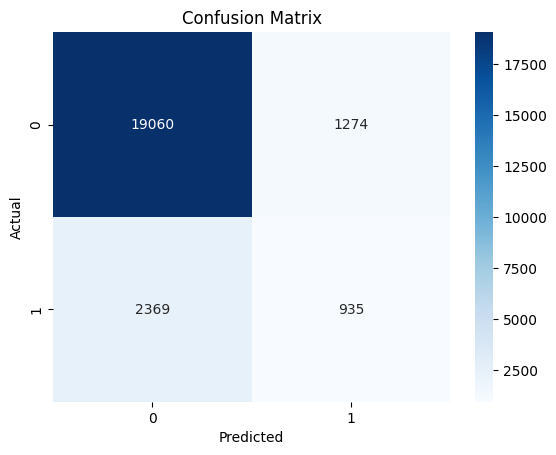

Weights: [ 32.5  23.8 -20.9  -1.  -10.3  11.7  16.7 -16.    2.6  -3.5 -32.9 -27.7
 -17.9   9.8  -3.8  -0.6  13.6   5.9   5.8  -8.9  -4.3   0. ]
Accuracy: 0.8466810508947836


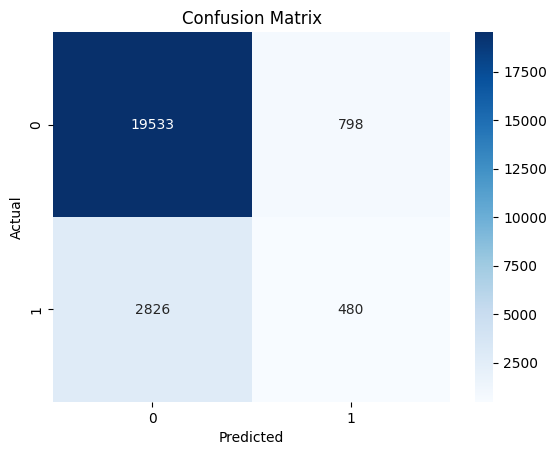

Weights: [ 3.11000000e+01  2.37000000e+01 -2.09000000e+01 -1.09960929e-11
 -7.90000000e+00  9.90000000e+00  1.91000000e+01 -1.63000000e+01
 -2.00000000e-01 -4.00000000e+00 -3.35000000e+01 -2.64000000e+01
 -1.88000000e+01  5.50000000e+00 -1.30000000e+00  3.00000000e-01
  1.35000000e+01  4.90000000e+00  3.00000000e+00 -1.15000000e+01
 -3.40000000e+00  0.00000000e+00]
Accuracy: 0.855819266404366


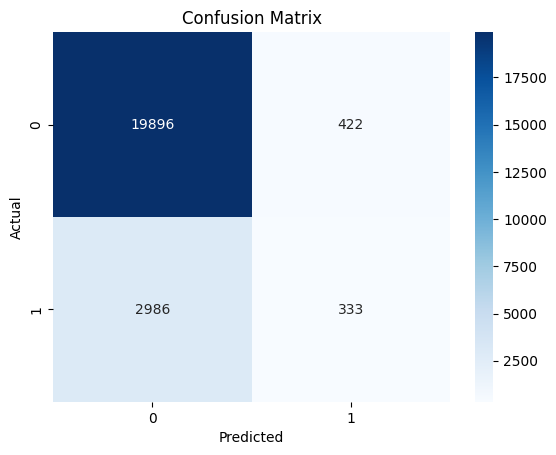

In [ ]:

# Initialize 10-fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=32)


for train_index, test_index in kf.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    weights, accuracy = train_perceptron(x_train, y_train, x_test, y_test)

    print("Weights:", weights)
    print("Accuracy:", accuracy)

    # Use weights and bias to predict the classes for testing data
    x_test = np.column_stack([x_test, np.zeros(len(x_test))])
    test_predictions = [1 if np.dot(sample, weights) >= 0 else 0 for sample in x_test]

    # Plot confusion matrix for each fold
    plot_confusion_matrix(y_test, test_predictions)